In [1]:
import pandas as pd
import numpy as np

In [2]:
vaxx_myths_df = pd.read_csv('/Users/mikid/Downloads/vaxx_myths_edit.csv')

In [3]:
vaxx_myths_df

,documents,clean_documents
0,health canada approves astrazeneca covid-19 va...,health canada approve astrazeneca vaccine
1,covid-19 in canada: 'vaccination passports' a ...,canada vaccination passport near certainty say...
2,coronavirus variants could fuel canada's third...,coronavirus variant could fuel canada's third ...
3,canadian government to extend covid-19 emergen...,canadian government extend emergency benefit
4,canada: pfizer is 'extremely committed' to mee...,canada pfizer extremely committed meeting vacc...
...,...,...
1613,dont feel bad. i wasnt in a coma & am also con...,dont feel bad wasnt coma also confuse ab go un...
1614,was it misguided back then? since everyone got...,misguide back since everyone get measles serio...
1615,that and the vaccine was available until 1960 ...,vaccine available something
1616,because it wasnt controlled and while the kids...,wasnt control kid gain immunity experience hor...


### Removes emojiis from dataframe

In [4]:
vaxx_myths_df = vaxx_myths_df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [5]:
import string
import nltk
from nltk.corpus import wordnet
import re
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [6]:

#nltk.download()

In [7]:
# return the wordnet object value corresponding to the POS tag


def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)
# clean text data
vaxx_myths_df["clean_documents"] =vaxx_myths_df["documents"].apply(lambda x: clean_text(x))

In [8]:
vaxx_myths_df

,documents,clean_documents
0,health canada approves astrazeneca covid-19 va...,health canada approve astrazeneca vaccine
1,covid-19 in canada: 'vaccination passports' a ...,canada vaccination passport near certainty say...
2,coronavirus variants could fuel canada's third...,coronavirus variant could fuel canada's third ...
3,canadian government to extend covid-19 emergen...,canadian government extend emergency benefit
4,canada: pfizer is 'extremely committed' to mee...,canada pfizer extremely committed meeting vacc...
...,...,...
1613,dont feel bad. i wasnt in a coma & am also con...,dont feel bad wasnt coma also confuse ab go un...
1614,was it misguided back then? since everyone got...,misguide back since everyone get measles serio...
1615,that and the vaccine was available until 1960 ...,vaccine available something
1616,because it wasnt controlled and while the kids...,wasnt control kid gain immunity experience hor...


In [9]:
#pip install wordcloud

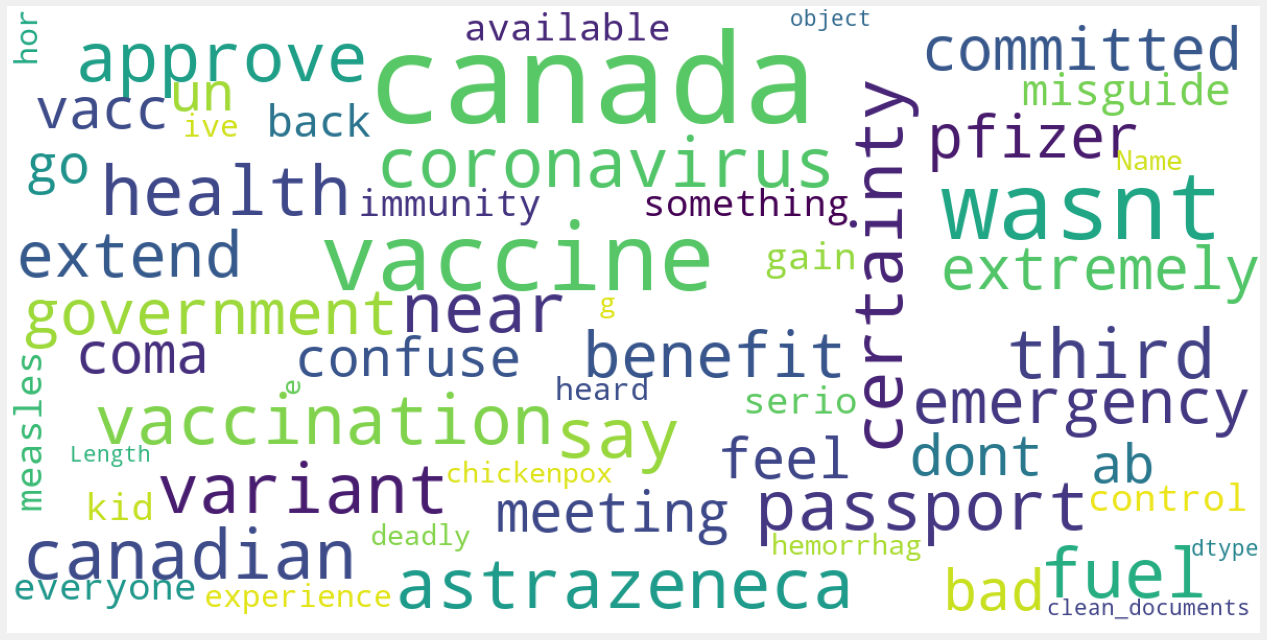

In [10]:
# wordcloud function
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    #fig.savefig("wordcloud.png")
    plt.show()
# print wordcloud
#show_wordcloud(vaxx_myths_df["clean_documents"])

In [11]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
my_stop_words = text.ENGLISH_STOP_WORDS.union({'https', 've', 'http' 'www' })

In [12]:
def make_topics(docs, preprocessor, vectorizer, topic_modeler, print_n_words=15):
    """A very simple pipeline."""
    
    # Apply preprocessor, vectorizer, and topic modeler.
    if preprocessor is not None:
        docs = docs.apply(preprocessor)
    
    # Vectorize documents into a document-word matrix.
    doc_word_vectors = vectorizer.fit_transform(docs)
    
    # Fit the topic model.
    doc_topic_vectors = topic_modeler.fit_transform(doc_word_vectors)
    
    # Print the topics.
    vocab = vectorizer.get_feature_names()
    for idx, topic in enumerate(topic_modeler.components_):
        # Select the top 15 words in vocab for this topic.
        top_words = [vocab[i].upper() for i in topic.argsort()[:-print_n_words-1:-1]]
        print(f"Topic {idx}:\n", ", ".join(top_words), "\n")
    
    return doc_topic_vectors

## Final Topic Model

In [13]:
### ##Final NMF Model

from sklearn.feature_extraction import text
docs = vaxx_myths_df["documents"]

preprocessor = lambda doc: doc.lower().replace("vaccines", 'vaccine')
preprocessor = lambda doc: doc.lower().replace("vaxxers", 'vaxxer')
my_stop_words = text.ENGLISH_STOP_WORDS.union({'https', 've', 'http' 'www','com','just', 'oh','op'})
vectorizer = TfidfVectorizer(stop_words = my_stop_words, strip_accents = 'ascii', max_df = 0.90, min_df = 10)
topic_modeler = NMF(8, random_state=10, max_iter=3000)  # NOTE: I use a random state here to make the results deterministic.

make_topics(docs, preprocessor, vectorizer, topic_modeler);

Topic 0:
 VACCINE, COVID, USED, POLIO, 19, SAFETY, CORONAVIRUS, ORG, AVAILABLE, VIRUS, CELLS, BAD, FLU, PFIZER, LIVE 

Topic 1:
 KNOW, PEOPLE, DON, THINK, WANT, WRONG, YES, REALLY, DONT, SAY, SAID, GOOD, SAYING, ACTUALLY, BAD 

Topic 2:
 ANTI, VAXXER, VAX, VACCINATION, HELP, VAXX, GOOD, NEED, GROUP, PROBABLY, REDDIT, STUPID, DEBATE, POINTS, ARGUMENTS 

Topic 3:
 BUD, GOT, VACCINATED, POX, SHINGLES, CHICKEN, SHOT, TIME, PROBLEMS, BRAIN, GOING, COVID, YEARS, MEAN, DOCTOR 

Topic 4:
 MEASLES, VACCINATED, VACCINATION, IMMUNITY, CHILDREN, STUDY, CASES, IMMUNE, UNVACCINATED, OUTBREAK, VIRUS, CDC, GOV, FLU, RISK 

Topic 5:
 LIKE, VACCINATED, YEAH, BEST, GOING, DONT, DAY, THINGS, PROBLEM, REAL, THREAD, CHILD, PRO, COMPANIES, KIDS 

Topic 6:
 AUTISM, CAUSE, MMR, STUDY, RATE, CHILDREN, CDC, CAUSED, DAMAGE, LINK, SAYING, STUDIES, READ, TELL, EVIDENCE 

Topic 7:
 MERCURY, THIMEROSAL, CONTAIN, COMPOUND, CONTAINS, TOXIC, ELEMENTS, DOES, SODIUM, COMPOUNDS, ORGANIC, ETHYLMERCURY, RIGHT, MYTH, ISN 



/Users/mikid/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [14]:
ex_label = [doc[:]+"..." for doc in docs]

In [15]:
doc_word = vectorizer.fit_transform(docs)
pd.DataFrame(doc_word.toarray(), index=ex_label, columns=vectorizer.get_feature_names())

,000,04,10,100,1000,11,12,15,18,19,...,wrong,x200b,yeah,year,years,yes,young,youre,youtube,zero
health canada approves astrazeneca covid-19 vaccine...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.617109,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
covid-19 in canada: 'vaccination passports' a near certainty says bio-ethicist...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.570836,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
coronavirus variants could fuel canada's third wave...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
canadian government to extend covid-19 emergency benefits...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.589869,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
canada: pfizer is 'extremely committed' to meeting vaccine delivery targets...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dont feel bad. i wasnt in a coma & am also confused ab what is going on. i only uncovered it when i became a parent & saw people openly asking for pediatrician recommendations for doctors that dont push vaccine in fb groups....,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
"was it misguided back then? since everyone got measles and it is more serious for people over 20, it made sense to get it on purpose when you were younger, so that you would be immune and not get it when you were older (same with chickenpox, but that is more serious if over 12)\n\nhowever, nowadays we have a weakened virus (in the vaccine) that makes us immune but is way less likely to cause complications, so now it makes no sense to choose the stronger virus....",0.0,0.0,0.0,0.0,0.0,0.0,0.221976,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
that and the vaccine was available until 1960 or something...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
because it wasnt controlled and while the kids did gain immunity the experience was horrible....,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [16]:
nmf_model = topic_modeler
doc_topic = nmf_model.fit_transform(doc_word)

/Users/mikid/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [17]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_0","component_1","component_2","component_3","component_4","component_5","component_6","component_7"],
             columns = vectorizer.get_feature_names())
topic_word

,000,04,10,100,1000,11,12,15,18,19,...,wrong,x200b,yeah,year,years,yes,young,youre,youtube,zero
component_0,0.021,0.012,0.000,0.035,0.000,0.005,0.021,0.009,0.016,0.120,...,0.000,0.000,0.016,0.043,0.056,0.000,0.004,0.002,0.023,0.000
component_1,0.000,0.000,0.012,0.032,0.000,0.000,0.000,0.000,0.002,0.001,...,0.382,0.000,0.052,0.030,0.070,0.388,0.005,0.082,0.038,0.012
component_2,0.000,0.000,0.000,0.000,0.006,0.000,0.001,0.001,0.000,0.007,...,0.000,0.000,0.000,0.002,0.026,0.000,0.003,0.000,0.000,0.007
component_3,0.000,0.001,0.021,0.000,0.000,0.000,0.002,0.007,0.000,0.000,...,0.000,0.000,0.039,0.000,0.010,0.000,0.000,0.028,0.010,0.000
component_4,0.118,0.041,0.074,0.059,0.085,0.037,0.031,0.044,0.029,0.022,...,0.000,0.131,0.000,0.122,0.118,0.000,0.037,0.000,0.000,0.015
component_5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.008,0.000,...,0.050,0.000,0.128,0.002,0.017,0.000,0.020,0.058,0.000,0.000
component_6,0.000,0.014,0.032,0.000,0.023,0.000,0.025,0.000,0.007,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.019,0.043
component_7,0.023,0.000,0.026,0.022,0.000,0.000,0.010,0.000,0.001,0.000,...,0.000,0.056,0.067,0.000,0.000,0.000,0.000,0.006,0.008,0.010


## Display Topics and Topic Weights

In [18]:
  def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [19]:
display_topics(nmf_model, vectorizer.get_feature_names(),15)


Topic  0
vaccine, covid, used, polio, 19, safety, coronavirus, org, available, virus, cells, bad, flu, pfizer, live

Topic  1
know, people, don, think, want, yes, wrong, really, dont, say, said, good, saying, actually, bad

Topic  2
bud, got, vaccinated, pox, shingles, chicken, shot, time, problems, brain, going, covid, years, mean, doctor

Topic  3
anti, vax, vaxxers, vaxxer, vaccination, help, vaxx, need, good, group, debate, points, reddit, probably, friend

Topic  4
measles, vaccinated, vaccination, immunity, children, study, cases, immune, unvaccinated, outbreak, virus, cdc, gov, risk, flu

Topic  5
like, vaccinated, yeah, best, going, dont, thread, day, things, real, problem, child, pro, companies, kids

Topic  6
autism, cause, mmr, study, rate, children, cdc, caused, damage, link, saying, studies, read, tell, evidence

Topic  7
mercury, thimerosal, contain, compound, contains, toxic, elements, does, sodium, compounds, organic, ethylmercury, right, myth, isn


In [20]:
def display_topic_weights(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([str(topic[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [21]:
display_topic_weights(nmf_model, vectorizer.get_feature_names(),7)


Topic  0
2.9544787215718253, 0.2719630106007686, 0.13439708846045612, 0.12824379606541872, 0.1199008608202555, 0.11398217609063031, 0.1011066033578173

Topic  1
1.0832211125958888, 0.9165998314319684, 0.8043786873577283, 0.6674484907999176, 0.40456188066365806, 0.38827560003041695, 0.3821842928218059

Topic  2
1.4837564294827756, 1.3933832615591244, 0.07345132869131228, 0.07248376202444572, 0.06981775204676363, 0.06621698781051431, 0.04555293280844407

Topic  3
1.6811191734342885, 0.5727078976994355, 0.44523408515298174, 0.35399594200389883, 0.30623857878644284, 0.17365393000891324, 0.1299448983428602

Topic  4
1.2535771251094503, 0.5482300581216869, 0.5148193813464537, 0.37242564702506104, 0.3163456048937381, 0.29276227357848367, 0.23738009240556895

Topic  5
1.7377283636351095, 0.14315223417387482, 0.12766596769804242, 0.11439285085016775, 0.10848717881689321, 0.10552034184052718, 0.09002722787463845

Topic  6
1.4428440944392273, 0.6325679290896089, 0.2604385696263633, 0.22273299024

In [22]:
H = pd.DataFrame(doc_topic.round(5),
             index = ex_label,
             columns = ["component_0","component_1","component_2","component_3","component_4","component_5","component_6","component_7"])
H

,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7
health canada approves astrazeneca covid-19 vaccine...,0.10669,0.00000,0.00341,0.00000,0.01372,0.00000,0.00000,0.00000
covid-19 in canada: 'vaccination passports' a near certainty says bio-ethicist...,0.02235,0.00000,0.00199,0.02892,0.06053,0.00000,0.00594,0.00000
coronavirus variants could fuel canada's third wave...,0.01105,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
canadian government to extend covid-19 emergency benefits...,0.02325,0.01172,0.00404,0.00000,0.00000,0.00000,0.00000,0.00000
canada: pfizer is 'extremely committed' to meeting vaccine delivery targets...,0.09082,0.00000,0.00230,0.00131,0.00000,0.00532,0.00000,0.00204
...,...,...,...,...,...,...,...,...
dont feel bad. i wasnt in a coma & am also confused ab what is going on. i only uncovered it when i became a parent & saw people openly asking for pediatrician recommendations for doctors that dont push vaccine in fb groups....,0.04843,0.08605,0.00000,0.00000,0.00000,0.02067,0.00000,0.00000
"was it misguided back then? since everyone got measles and it is more serious for people over 20, it made sense to get it on purpose when you were younger, so that you would be immune and not get it when you were older (same with chickenpox, but that is more serious if over 12)\n\nhowever, nowadays we have a weakened virus (in the vaccine) that makes us immune but is way less likely to cause complications, so now it makes no sense to choose the stronger virus....",0.03115,0.02388,0.05569,0.00000,0.11268,0.00000,0.02225,0.00016
that and the vaccine was available until 1960 or something...,0.11898,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
because it wasnt controlled and while the kids did gain immunity the experience was horrible....,0.00000,0.01960,0.00000,0.00000,0.07666,0.00569,0.00000,0.00000


In [23]:
H["component_0"].argmax()

5

In [24]:
docs.iloc[5]

'canada: oxford-astrazeneca vaccine approval expected this week'

### Create dictionaries for topics and weights

In [32]:
from collections import defaultdict

/Users/mikid/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
def display_topics_word_dict(model, feature_names, no_top_words, topic_names=None):
    topic_word_dict = defaultdict()
   
    for ix, topic in enumerate(model.components_):
        topic_word_dict[ix] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        
    return  topic_word_dict

/Users/mikid/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
def display_topic_weights(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([str(topic[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]))

/Users/mikid/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
display_topics_word_dict(nmf_model, vectorizer.get_feature_names(),15)

/Users/mikid/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


defaultdict(None,
            {0: ['vaccine',
              'covid',
              'used',
              'polio',
              '19',
              'safety',
              'coronavirus',
              'org',
              'available',
              'virus',
              'cells',
              'bad',
              'flu',
              'pfizer',
              'live'],
             1: ['know',
              'people',
              'don',
              'think',
              'want',
              'yes',
              'wrong',
              'really',
              'dont',
              'say',
              'said',
              'good',
              'saying',
              'actually',
              'bad'],
             2: ['bud',
              'got',
              'vaccinated',
              'pox',
              'shingles',
              'chicken',
              'shot',
              'time',
              'problems',
              'brain',
              'going',
              'covid',
    

In [ ]:
display_topic_weights(nmf_model, vectorizer.get_feature_names(),15)

## Let's Look LDA Model

In [28]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [29]:
tf_vectorizer = vectorizer
dtm_tf = tf_vectorizer.fit_transform(docs)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(docs)

/Users/mikid/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=8, random_state=10)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=8, random_state=10)
lda_tfidf.fit(dtm_tfidf)

/Users/mikid/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=8, random_state=10)

In [31]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/Users/mikid/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.089653 -0.164158       1        1  18.598839
7      0.012693  0.087616       2        1  16.366569
4     -0.057507  0.026712       3        1  12.715996
3     -0.111817 -0.017191       4        1  11.883171
5     -0.065042 -0.067699       5        1  11.100767
1     -0.086102 -0.005836       6        1  10.776492
6      0.170067  0.012777       7        1   9.820040
0      0.048054  0.127779       8        1   8.738126, topic_info=           Term       Freq      Total Category  logprob  loglift
383     mercury  19.000000  19.000000  Default  30.0000  30.0000
78          bud  11.000000  11.000000  Default  29.0000  29.0000
359         lol  11.000000  11.000000  Default  28.0000  28.0000
379     measles  22.000000  22.000000  Default  27.0000  27.0000
258         got  19.000000  19.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
35         anti   3.002568  29.803847   Topic8  -4.7543   0.1423
636  vaccinated   2.826282  21.367523   Topic8  -4.8148   0.4146
418         old   2.359866   6.466134   Topic8  -4.9952   1.4295
349        like   2.945678  34.203668   Topic8  -4.7735  -0.0145
336        know   2.615773  28.484389   Topic8  -4.8922   0.0497

[407 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1         7  0.678745       04
3         2  0.671418      100
3         3  0.167854      100
3         5  0.167854      100
4         3  0.556797     1000
...     ...       ...      ...
678       8  0.059801      yes
680       2  0.290598    youre
680       4  0.435897    youre
680       5  0.145299    youre
681       6  0.694854  youtube

[895 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 5, 4, 6, 2, 7, 1])

In [ ]:
display_topics(lda_tf, vectorizer.get_feature_names(),8)

In [ ]:
doc_topic = lda_tf.fit_transform(dtm_tf)

In [ ]:
H = pd.DataFrame(doc_topic.round(5),
             index = ex_label,
             columns = ["component_0","component_1","component_2","component_3","component_4","component_5","component_6","component_7"])
H

In [ ]:
H["component_7"].argmax()

In [ ]:
docs.iloc[988]